# Multiclass classification

Example: recognising multiple digits, deseases, defect classes...   
The labels are still discrete.  
One needs decision boundaries between all these categories  

## Softmax algorithm (genralization of logisitc regression)
Recall logistic regression is for two labels, the $z=\vec{w}\cdot\vec{x}+b$, then the activation value is $a=g(z)=(1+e^{-z})^{-1}=Pr(y=1|\vec{x})$, with sigmoid function and interpreted as probability $Pr()$. And at the same time the probability of the other label is known, as $1-Pr(y=1|\vec{x})$

In Softmax regression, it is generalized as  
$z_1=\vec{w_1}\cdot\vec{x}+b_1$  
...  
$z_4=\vec{w_4}\cdot\vec{x}+b_4$  
with $\{w_i,b_i\}$ being the parameters of the softmax regression
Then,   
$a_1 = e^{z_1}(\sum_i(e^{z_i}))^{-1} = Pr(y=1|\vec{x})$  
...  
$a_4 = e^{z_4}(\sum_i(e^{z_i}))^{-1} = Pr(y=4|\vec{x})$  
And as before, sum of all probabilities $Pr(y=i)|vec{x} = 1$. 

#### General formula:
$z_j=\vec{w_j}\cdot\vec{x}+b_j$ $j=1...N$  
$a_j = e^{z_j}(\sum_{k=1}^N(e^{z_k}))^{-1} = Pr(y=j|\vec{x})$ 

### Cost function

$$
loss(a_1...a_N,y)=
\begin{cases}
-\log(a_1)\text{ if } y=1 \\
-\log(a_2)\text{ if } y=2 \\
... \\
-\log(a_N)\text{ if } y=N \\
\end{cases}
$$

So the loss function depends on the predicted label. 

# Neural network with softmax output

Change the output layer to `softmax` layer.  
There, we use `General formula` as before to give the probability.  
The **unusual** thing is: 
In other activation function, $a_i = f(z_i)$ only. While here, $a_i = f (z_1...z_N$)$, i.e., all values of $z$.  


# Tensor flow implementation

- Last Dense layer has activation 'softmax'
- compile with 'loss=SparseCategoricalCrossentropy' 

## Numerical roundoff error 

Value of $1/10^4$ depends on how it is computed. 
In tensorflow (for linear regression) this is achieved by directly specifiing at complie:   
$\texttt{model.compule(loss=BinaryCorssEntropy(from\_logits=True))}$  
for softmax regression, we specify at 
$\texttt{model.compule(loss=SparseCategoricalCorssEntropy(from\_logits=True))}$   
To get the probability then use  
$\texttt{tf.nn.sigmoid(logit)}$

###  SparseCategorialCrossentropy or CategoricalCrossEntropy
Tensorflow has two potential formats for target values and the selection of the loss defines which is expected.
- $\texttt{SparseCategorialCrossentropy}$: expects the target to be an integer corresponding to the index. For example, if there are 10 potential target values, y would be between 0 and 9. 
- $\texttt{CategoricalCrossEntropy}$: Expects the target value of an example to be one-hot encoded where the value at the target index is 1 while the other $N-1$ entries are zero. An example with 10 potential target values, where the target is 2 would be [0,0,1,0,0,0,0,0,0,0].




# Multilabel classification problem $\neq$ multicalss classication

Here, for each image there might be many labels (what is on the image). Then, $y=\vec{y}$ a column-vector. 

To build a NN use (i) several independent NNs (but it is numerically expensive) (ii) train a single net, and use a sigmoid activation for a final layer. 

$\textcolor{red}{\text{more research here needed}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

2023-05-17 08:59:50.557038: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


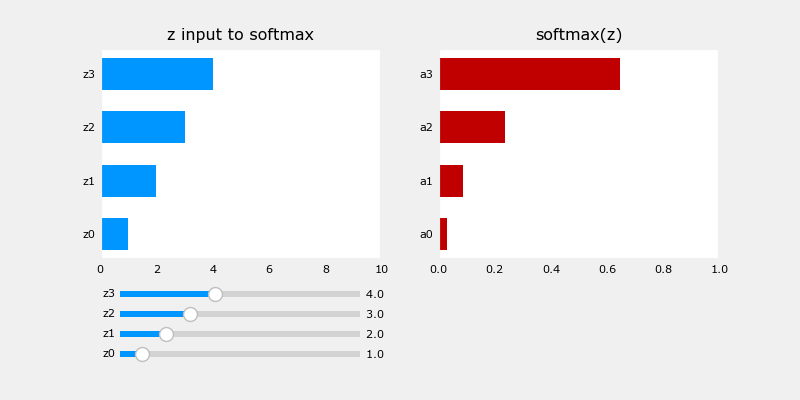

In [3]:
## Softmax Function
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)
plt.close("all")
plt_softmax(my_softmax)

In [5]:
## Tensorflow
# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10
)
# Because the softmax is integrated into the output layer, the output is a vector of probabilities.
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

Epoch 1/10
63/63 [==============================] - 0s 4ms/step - loss: 0.9511
Epoch 2/10
63/63 [==============================] - 0s 4ms/step - loss: 0.3068
Epoch 3/10
63/63 [==============================] - 0s 3ms/step - loss: 0.1336
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0832
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0625
Epoch 6/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0514
Epoch 7/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0449
Epoch 8/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0398
Epoch 9/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0366
Epoch 10/10
63/63 [==============================] - 0s 3ms/step
[[1.44e-03 5.84e-03 9.79e-01 1.36e-02]
 [9.98e-01 1.92e-03 4.33e-05 1.87e-04]]
largest value 0.99999964 smallest value 1.2322404e-10


In [7]:
# Recall from lecture, more stable and accurate results can be obtained 
# if the softmax and loss are combined during training.   
# This is enabled by the 'preferred' organization shown here.

preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)
# the outputs are not probabilities! 
# must be sent through a softmax when performing a prediction that expects a probability. 
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))
  

Epoch 1/10
63/63 [==============================] - 0s 5ms/step - loss: 0.9680
Epoch 2/10
63/63 [==============================] - 0s 4ms/step - loss: 0.3698
Epoch 3/10
63/63 [==============================] - 0s 3ms/step - loss: 0.1801
Epoch 4/10
63/63 [==============================] - 0s 4ms/step - loss: 0.1130
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0842
Epoch 6/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0689
Epoch 7/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0598
Epoch 8/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0542
Epoch 9/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0496
Epoch 10/10
63/63 [==============================] - 0s 3ms/step
two example output vectors:
 [[-1.61 -1.75  3.78  0.12]
 [ 6.16  1.59 -2.62 -2.85]]
largest value 13.055417 smallest value -6.3761497


In [9]:
# he output predictions are not probabilities!
# If the desired output are probabilities, 
# the output should be be processed by a 
# [softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax).
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[4.44e-03 3.84e-03 9.67e-01 2.50e-02]
 [9.89e-01 1.02e-02 1.52e-04 1.21e-04]]
largest value 0.999998 smallest value 3.6389587e-09


In [10]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-1.61 -1.75  3.78  0.12], category: 2
[ 6.16  1.59 -2.62 -2.85], category: 0
[ 4.44  1.49 -2.06 -2.43], category: 0
[-2.37  3.54 -2.31 -1.94], category: 1
[ 0.07 -1.9   5.69 -1.04], category: 2


# Optional Lab - Multi-class Classification


In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

/home/vsevolod/Work/GIT/GitHub/DataScienceLearning/AndrewNg_course2/module2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


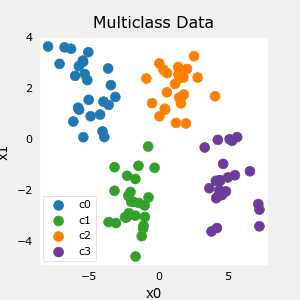

In [14]:
# make 4-class dataset for classification
# use Scikit-Learn `make_blobs` function to make a training data set with 4 categories as shown in the plot below.
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)
plt_mc(X_train,y_train,classes, centers, std=std)

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)
Epoch 1/200
4/4 [==============================] - 0s 10ms/step - loss: 1.7428
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 1.6072
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 1.5020
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 1.4280
Epoch 5/200
4/4 [==============================] - 0s 12ms/step - loss: 1.3660
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 1.3145
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 1.2696
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 1.2278
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1904
Epoch 10/200
4/4 [==============================] - 0s 7ms/step - loss: 1.1496
Epoch 11/200
4/4 [==============================] - 0s 9ms/step - loss: 1.1140
Epoch 12/200
4/4 

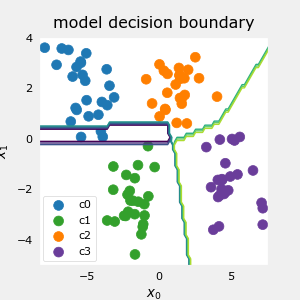

In [16]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

# it is more numerically stable if linear outputs are passed to the loss function during training
# If the model is used to predict probabilities, the softmax can be applied at that point.
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2") # has four outputs, one for each class.
    ]
)

# Setting `from_logits=True` as an argument to the loss function 
# specifies that the output activation was linear rather than a softmax.
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X_train,y_train,
    epochs=200
)

plt_cat_mc(X_train, y_train, model, classes)


/home/vsevolod/Work/GIT/GitHub/DataScienceLearning/AndrewNg_course2/module2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/home/vsevolod/Work/GIT/GitHub/DataScienceLearning/AndrewNg_course2/module2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


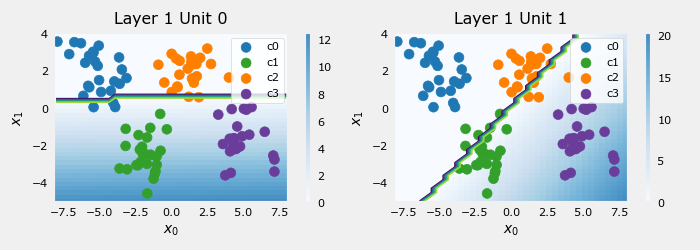

In [19]:
# Explanations on how the result was achieved

# gather the trained parameters from the first layer
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

# plot the function of the first layer
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)



## Explanation
#### Layer 1 
These plots show the function of Units 0 and 1 in the first layer of the network. The inputs are ($x_0,x_1$) on the axis. The output of the unit is represented by the color of the background. This is indicated by the color bar on the right of each graph. Notice that since these units are using a ReLu, the outputs do not necessarily fall between 0 and 1 and in this case are greater than 20 at their peaks. 
The contour lines in this graph show the transition point between the output, $a^{[1]}_j$ being zero and non-zero. Recall the graph for a ReLu. The contour line in the graph is the inflection point in the ReLu.

Unit 0 has separated classes 0 and 1 from classes 2 and 3. Points to the left of the line (classes 0 and 1) will output zero, while points to the right will output a value greater than zero.  
Unit 1 has separated classes 0 and 2 from classes 1 and 3. Points above the line (classes 0 and 2 ) will output a zero, while points below will output a value greater than zero. Let's see how this works out in the next layer!

/home/vsevolod/Work/GIT/GitHub/DataScienceLearning/AndrewNg_course2/module2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/home/vsevolod/Work/GIT/GitHub/DataScienceLearning/AndrewNg_course2/module2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/home/vsevolod/Work/GIT/GitHub/DataScienceLearning/AndrewNg_course2/module2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/home/vsevolod/Work/GIT/GitHub/DataScienceLearning/AndrewNg_course2/module2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker

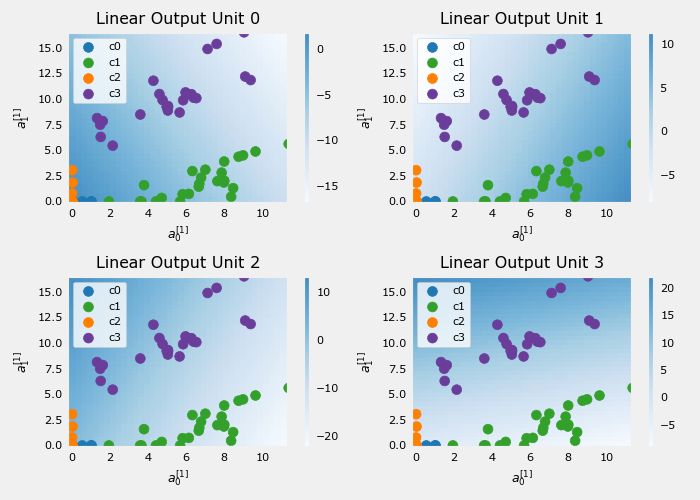

In [20]:
# gather the trained parameters from the output layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# create the 'new features', the training examples after L1 transformation
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))

The dots in these graphs are the training examples translated by the first layer. One way to think of this is the first layer has created a new set of features for evaluation by the 2nd layer. The axes in these plots are the outputs of the previous layer $a^{[1]}_0$ and $a^{[1]}_1$. As predicted above, classes 0 and 1 (blue and green) have  $a^{[1]}_0 = 0$ while classes 0 and 2 (blue and orange) have $a^{[1]}_1 = 0$.  
Once again, the intensity of the background color indicates the highest values.  
Unit 0 will produce its maximum value for values near (0,0), where class 0 (blue) has been mapped.    
Unit 1 produces its highest values in the upper left corner selecting class 1 (green).  
Unit 2 targets the lower right corner where class 2 (orange) resides.  
Unit 3 produces its highest values in the upper right selecting our final class (purple).  

One other aspect that is not obvious from the graphs is that the values have been coordinated between the units. It is not sufficient for a unit to produce a maximum value for the class it is selecting for, it must also be the highest value of all the units for points in that class. This is done by the implied softmax function that is part of the loss function (`SparseCategoricalCrossEntropy`). Unlike other activation functions, the softmax works across all the outputs.

You can successfully use neural networks without knowing the details of what each unit is up to. Hopefully, this example has provided some intuition about what is happening under the hood.